In [2]:
!nvidia-smi

Wed Sep 15 16:22:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 12 kB/s 


In [5]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [7]:
IMAGE_SIZE = [224, 224]
X= '/content/drive/MyDrive/Colab Notebooks/Covid Dataset'
y= '/content/drive/MyDrive/Colab Notebooks/Covid Dataset'

In [8]:
from sklearn.model_selection import train_test_split
X_train, y_train,X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [9]:
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9420800/9406464 [==============================] - 0s 0us/step


In [10]:
for layer in mobilenet.layers:
    layer.trainable = False

In [11]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/*')

In [12]:
folders

['/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Pneumonia',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Fungal',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Normal',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Unknown',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Viral',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Tuberculosis',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Covid',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Lipoid',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Bacterial',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Other']

In [13]:
x = Flatten()(mobilenet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=mobilenet.input, outputs=prediction)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Covid Dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 877 images belonging to 10 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Covid Dataset',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 877 images belonging to 10 classes.


In [20]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
55/55 [==============================] - 410s 7s/step - loss: 3.4758 - accuracy: 0.7765 - val_loss: 1.2516 - val_accuracy: 0.9099
Epoch 2/20
55/55 [==============================] - 130s 2s/step - loss: 1.4892 - accuracy: 0.9008 - val_loss: 0.4883 - val_accuracy: 0.9510
Epoch 3/20
55/55 [==============================] - 128s 2s/step - loss: 0.6379 - accuracy: 0.9464 - val_loss: 0.5196 - val_accuracy: 0.9601
Epoch 4/20
55/55 [==============================] - 130s 2s/step - loss: 0.7892 - accuracy: 0.9578 - val_loss: 0.3136 - val_accuracy: 0.9692
Epoch 5/20
55/55 [==============================] - 131s 2s/step - loss: 0.6269 - accuracy: 0.9612 - val_loss: 0.8199 - val_accuracy: 0.9407
Epoch 6/20
55/55 [==============================] - 130s 2s/step - loss: 0.9152 - accuracy: 0.9555 - val_loss: 0.4193 - val_accuracy: 0.9658
Epoch 7/20
55/55 [==============================] - 132s 2s/step - loss: 0.8799 - accuracy: 0.9647 - val_loss: 0.4920 - val_accuracy: 0.9738
Epoch 8/20
55

In [21]:
import matplotlib.pyplot as plt

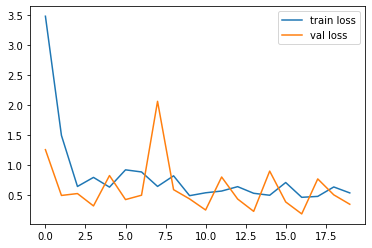

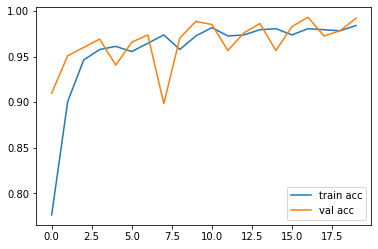

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
from tensorflow.keras.models import load_model

model.save('model_mobilenet.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [24]:
y_pred = model.predict(test_set)

In [25]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 3.5007980e-37, ..., 3.5528858e-32,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([5, 5, 1, 8, 3, 5, 2, 5, 1, 4, 1, 3, 6, 0, 4, 8, 9, 9, 7, 3, 8, 7,
       4, 9, 5, 0, 8, 7, 7, 8, 4, 3, 5, 2, 7, 7, 0, 4, 5, 6, 3, 5, 7, 4,
       3, 8, 4, 5, 6, 8, 7, 6, 9, 0, 8, 9, 4, 4, 3, 3, 3, 6, 6, 7, 0, 8,
       5, 4, 6, 8, 9, 3, 7, 4, 1, 9, 4, 7, 3, 7, 5, 5, 2, 6, 8, 5, 9, 1,
       6, 5, 5, 5, 3, 9, 5, 1, 9, 6, 0, 8, 5, 4, 6, 6, 8, 4, 8, 9, 9, 2,
       0, 8, 6, 0, 8, 0, 3, 4, 2, 7, 9, 9, 6, 3, 8, 0, 8, 1, 1, 2, 6, 7,
       5, 4, 0, 3, 0, 3, 5, 3, 7, 9, 3, 2, 6, 7, 4, 5, 0, 7, 5, 6, 8, 5,
       9, 7, 3, 3, 7, 7, 3, 9, 3, 3, 4, 5, 3, 4, 3, 0, 6, 6, 0, 2, 8, 2,
       0, 4, 7, 1, 9, 9, 9, 5, 2, 0, 4, 0, 2, 5, 8, 1, 0, 8, 9, 0, 4, 5,
       2, 2, 9, 8, 0, 6, 8, 1, 4, 5, 3, 9, 0, 5, 8, 4, 9, 3, 9, 5, 7, 7,
       3, 7, 4, 4, 4, 4, 0, 8, 8, 4, 9, 5, 9, 5, 2, 0, 9, 9, 4, 2, 0, 3,
       9, 4, 5, 4, 1, 2, 7, 6, 2, 5, 5, 5, 3, 8, 7, 8, 6, 9, 8, 9, 3, 7,
       6, 5, 7, 3, 5, 3, 4, 8, 2, 5, 8, 7, 6, 2, 7, 3, 9, 0, 7, 5, 5, 0,
       7, 7, 0, 6, 8, 9, 9, 0, 7, 0, 9, 5, 5, 6, 9,

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_mobilenet.h5')

In [30]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Unknown/Unknown_0_1080.jpeg',target_size=(224,224))

In [31]:
x=image.img_to_array(img)

In [32]:
x

array([[[  3.,   3.,   3.],
        [ 57.,  57.,  57.],
        [ 82.,  82.,  82.],
        ...,
        [155., 155., 155.],
        [164., 164., 164.],
        [169., 169., 169.]],

       [[102., 102., 102.],
        [ 94.,  94.,  94.],
        [ 79.,  79.,  79.],
        ...,
        [ 12.,  12.,  12.],
        [  6.,   6.,   6.],
        [  6.,   6.,   6.]],

       [[132., 132., 132.],
        [104., 104., 104.],
        [ 83.,  83.,  83.],
        ...,
        [ 10.,  10.,  10.],
        [  1.,   1.,   1.],
        [242., 242., 242.]],

       ...,

       [[179., 179., 179.],
        [183., 183., 183.],
        [183., 183., 183.],
        ...,
        [142., 142., 142.],
        [144., 144., 144.],
        [151., 151., 151.]],

       [[ 11.,  11.,  11.],
        [  3.,   3.,   3.],
        [  6.,   6.,   6.],
        ...,
        [157., 157., 157.],
        [151., 151., 151.],
        [150., 150., 150.]],

       [[ 14.,  14.,  14.],
        [  7.,   7.,   7.],
        [  7.,  

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
img_data

array([[[[-0.99990773, -0.99990773, -0.99990773],
         [-0.99824685, -0.99824685, -0.99824685],
         [-0.9974779 , -0.9974779 , -0.9974779 ],
         ...,
         [-0.9952326 , -0.9952326 , -0.9952326 ],
         [-0.9949558 , -0.9949558 , -0.9949558 ],
         [-0.994802  , -0.994802  , -0.994802  ]],

        [[-0.99686277, -0.99686277, -0.99686277],
         [-0.9971088 , -0.9971088 , -0.9971088 ],
         [-0.99757016, -0.99757016, -0.99757016],
         ...,
         [-0.9996309 , -0.9996309 , -0.9996309 ],
         [-0.99981546, -0.99981546, -0.99981546],
         [-0.99981546, -0.99981546, -0.99981546]],

        [[-0.99594   , -0.99594   , -0.99594   ],
         [-0.99680126, -0.99680126, -0.99680126],
         [-0.99744713, -0.99744713, -0.99744713],
         ...,
         [-0.99969244, -0.99969244, -0.99969244],
         [-0.99996924, -0.99996924, -0.99996924],
         [-0.9925567 , -0.9925567 , -0.9925567 ]],

        ...,

        [[-0.99449444, -0.99449444, -0

In [37]:
model.predict(img_data)

array([[4.0047660e-23, 0.0000000e+00, 1.2076727e-07, 4.6415901e-30,
        3.0338707e-32, 9.9999988e-01, 2.2650041e-24, 2.4265151e-36,
        2.2423919e-33, 5.7899008e-22]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

In [39]:
a==1

array([False])